# 量子博弈论 - 8皇后问题

八皇后难题是将八个国际象棋皇后放在 8×8 的棋盘上，使得两个皇后不会互相威胁；因此，解决方案要求没有两个皇后共享相同的行、列或对角线。有 92 种解决方案。这个问题最早是在 19 世纪中叶提出的。在现代，它经常被用作各种计算机编程技术的示例问题。

八皇后难题是更一般的 n 皇后问题的一个特例，即在 n×n 棋盘上放置 n 个非攻击皇后。除了 n = 2 和 n = 3 之外，所有自然数 n 都存在解。虽然仅在 n ≤ 27 时才知道解的确切数量，但解数量的渐近增长率约为 (0.143 n)n。 

国际象棋作曲家 Max Bezzel 于 1848 年发表了八皇后难题。Franz Nauck 在 1850 年发表了第一个解决方案。Nauck 还将该难题扩展到了 n 个皇后问题，即 n×n 方格的棋盘上有 n 个皇后

参考文献：https://en.wikipedia.org/wiki/Eight_queens_puzzle

### 导入依赖

In [1]:
from util import constraint, displayBoard
from sympy import *
from IPython.display import display
import dimod
import dynex
from util import constraint, displayBoard
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.image as mpimg
import matplotlib.offsetbox as offsetbox
init_printing()
%matplotlib inline

### 在dynex上计算

In [2]:
def NQueen2BQM(n):
    bqm = dimod.BinaryQuadraticModel('BINARY')
    for row in range(n):
        bqm.add_linear_equality_constraint(
            [(row * n + col, 1.0) for col in range(n)],
            constant=-1.0,
            lagrange_multiplier=n)
    for i in range(n):
        for j in range(n):
            if i < j:
                for k in range(n):
                    bqm.add_interaction(i * n + k, j * n + k, 2 * n)
                    if k + (j - i) < n:
                        bqm.add_interaction(i * n + k, j * n + (k + (j - i)), 2 * n)
                    if k - (j - i) >= 0:
                        bqm.add_interaction(i * n + k, j * n + (k - (j - i)), 2 * n)
    return bqm

def Visualize(board):
    n = len(board)
    cmap = mcolors.ListedColormap(['#f5ecce', '#614532'])
    img = mpimg.imread('nqueen/queen.png')
    fig, ax = plt.subplots()
    ax.matshow(np.add.outer(range(n), range(n)) % 2 == 0, cmap=cmap)
    plt.axis("off")  
    ax_width = ax.get_window_extent().width / ax.figure.dpi * fig.dpi
    ax_height = ax.get_window_extent().height / ax.figure.dpi * fig.dpi
    cell_size = min(ax_width, ax_height) / n
    img_height, img_width = img.shape[:2]
    scale_width = cell_size / img_width
    scale_height = cell_size / img_height
    scale = min(scale_width, scale_height)
    for r in range(n):
        for c in range(n):
            if board[r][c] == 'Q':
                box = offsetbox.OffsetImage(img, zoom=scale)
                ab = offsetbox.AnnotationBbox(box, (c, r), frameon=False)
                ax.add_artist(ab)
    scale_factor = 1.1  
    fig.set_size_inches(n * scale_factor, n * scale_factor)
    plt.show()
    return fig

def SolveNQueens(n):
    bqm = NQueen2BQM(n)
    model = dynex.BQM(bqm)
    sampler = dynex.DynexSampler(model, mainnet=False, description='Quantum 8 Queen Problem')
    sampleset = sampler.sample(num_reads=10000, annealing_time=500, debugging=False, alpha=10, beta=1)
    solution = sampleset.first.sample
    board = [['.' for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if solution[i * n + j] == 1:
                board[i][j] = 'Q'
    Visualize(board)

[DYNEX] 8 Queen Problem Solver
[DYNEX] SAMPLER INITIALISED
[DYNEX|TESTNET] *** WAITING FOR READS ***
╭────────────┬──────────┬─────────────────┬─────────────┬───────────┬───────────────────────────┬────────────┬─────────┬────────────────╮
│   DYNEXJOB │   QUBITS │   QUANTUM GATES │   BLOCK FEE │ ELAPSED   │ WORKERS READ              │ CIRCUITS   │ STEPS   │ GROUND STATE   │
├────────────┼──────────┼─────────────────┼─────────────┼───────────┼───────────────────────────┼────────────┼─────────┼────────────────┤
│         -1 │       72 │             800 │           0 │           │ *** WAITING FOR READS *** │            │         │                │
╰────────────┴──────────┴─────────────────┴─────────────┴───────────┴───────────────────────────┴────────────┴─────────┴────────────────╯

[DYNEX] FINISHED READ AFTER 0.38 SECONDS
[DYNEX] SAMPLESET READY


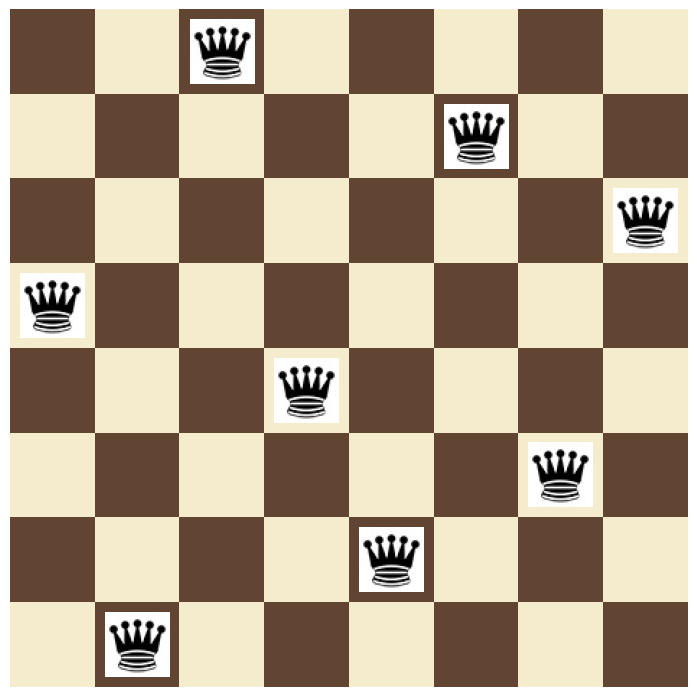

In [5]:
print("[DYNEX] 8 Queen Problem Solver")
n = 8
SolveNQueens(n)